In [1]:
library(data.table) 
library(ggplot2)
library(pheatmap)
library(grid)

## Visualisation of concordance between genetic and hashing deconvolution methods through confusion matrix

In [2]:
# Load the genetic and hashing result for comparison
hash_gene_result <- fread("../data/pipeline_output/gx38/assignment_all_genetic_and_hash_withHashedDrops.csv")

# Remove the trial ID
colnames(hash_gene_result) <- gsub("_1", "", colnames(hash_gene_result))

# Rename the donor id of vireo 
hash_gene_result$vireo <- gsub("donor", "", hash_gene_result$vireo)

# Rename the hashtag names of hashing methods
hash_gene_result$htodemux <- gsub("-TotalSeqA", "", hash_gene_result$htodemux)
hash_gene_result$multiseq <- gsub("-TotalSeqA", "", hash_gene_result$multiseq)
hash_gene_result$demuxem <- gsub("_TotalSeqA", "", hash_gene_result$demuxem)
hash_gene_result$hashsolo <- gsub("_TotalSeqA", "", hash_gene_result$hashsolo)

# Rename HashedDrops donor
hash_gene_result$hashedDrops <- ifelse(hash_gene_result$hashedDrops != 'negative', 
                                        paste0("Hash45", hash_gene_result$hashedDrops), 
                                        hash_gene_result$hashedDrops)

# Subset by only those cells detected by RNA
white_list_gx38 <- fread("../data/dataset/barcodes_gx38.tsv", header = F)$V1
hash_gene_result <- hash_gene_result[Barcode %in% white_list_gx38,]

head(hash_gene_result)

Barcode,freemuxlet,scsplit,souporcell,vireo,hashsolo,demuxem,hashedDrops,htodemux,multiseq
<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
TCATGAGTCACCACAA-1,2,doublet,4,0,doublet,doublet,negative,Hash453,Hash454
ACTTATCCATTCCTCG-1,0,1,doublet,doublet,doublet,Hash451,negative,negative,Hash451
ATAGAGACAACAACAA-1,0,4,2,3,doublet,negative,negative,negative,Hash456
GTAAGTCTCTTCACAT-1,0,4,2,3,Hash453,Hash452,negative,negative,Hash452
TCGAAGTTCAAACGTC-1,1,2,5,5,Hash453,doublet,negative,Hash453,doublet
GTCATCCAGGCTCACC-1,1,2,5,5,doublet,doublet,negative,doublet,doublet


,0,1,2,3,4,5
,<int>,<int>,<int>,<int>,<int>,<int>
Hash451,25,23,255,31,7,34
Hash452,48,49,15,88,436,66
Hash453,23,18,6,765,8,22
Hash454,856,54,14,54,28,73
Hash455,40,412,9,54,17,37
Hash456,30,39,12,40,11,642


pdf 
  3

pdf 
  2

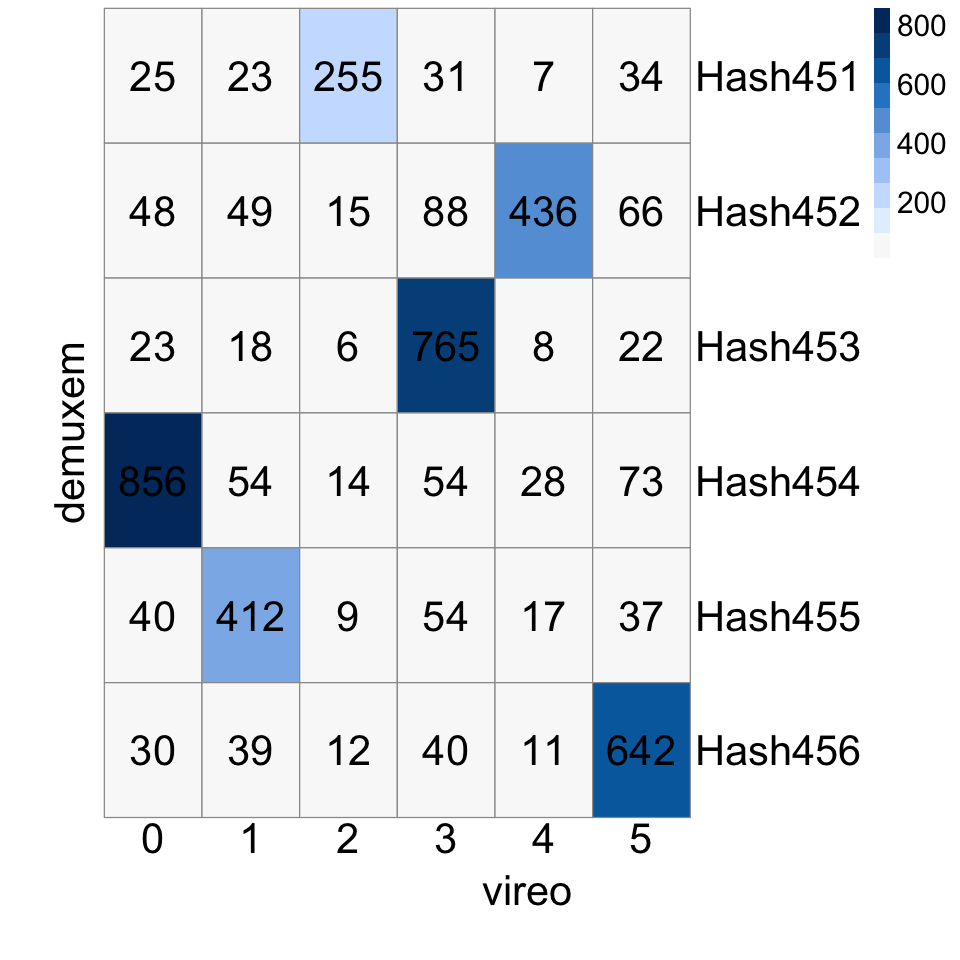

In [3]:
# Create an empyt matrix
confusion_matrix_v_demuxem = as.data.frame(matrix(ncol = 6, nrow = 6))
donor_list = paste0("Hash45",1:6)
donor_list_vireo = 0:5
colnames(confusion_matrix_v_demuxem) = donor_list_vireo
rownames(confusion_matrix_v_demuxem) = donor_list

for (j in c(0:5)){
  for (i in c(1:6)){
    row = nrow(hash_gene_result[hash_gene_result$vireo == donor_list_vireo[j+1] &
                                  hash_gene_result$demuxem == donor_list[i],])
    confusion_matrix_v_demuxem[i, j+1] = row
  }
}

confusion_matrix_v_demuxem

pdf("S21-heatmap-v-demuxem-gx38.pdf", width=11, height=11)

# Change plot size to 8 x 8
options(repr.plot.width=8, repr.plot.height=8)

# Add axis title
setHook("grid.newpage", function() 
    pushViewport(viewport(x=1,y=1,width=0.9, height=0.9, name="vp", just=c("right","top"))), action="prepend")

pheatmap(confusion_matrix_v_demuxem, treeheight_row=F, treeheight_col=F, display_numbers=T, angle_col="0",
         number_color = "black", fontsize_number= 25, fontsize = 18, fontsize_row = 25, fontsize_col = 25, cluster_rows = F, cluster_cols = F, number_format = "%.f",
         color = hcl.colors(10, "Blues 3", rev= T))

setHook("grid.newpage", NULL, "replace")
grid.text("vireo", y=-0.03, gp=gpar(fontsize=25))
grid.text("demuxem", x=-0.03, rot=90, gp=gpar(fontsize=25))
        
dev.copy()
dev.off()

,0,1,2,3,4,5
,<int>,<int>,<int>,<int>,<int>,<int>
Hash451,58,109,340,96,32,103
Hash452,67,107,20,127,502,99
Hash453,44,63,13,986,23,59
Hash454,1165,139,34,121,50,134
Hash455,12,218,1,14,3,5
Hash456,74,124,26,120,45,1009


pdf 
  3

pdf 
  2

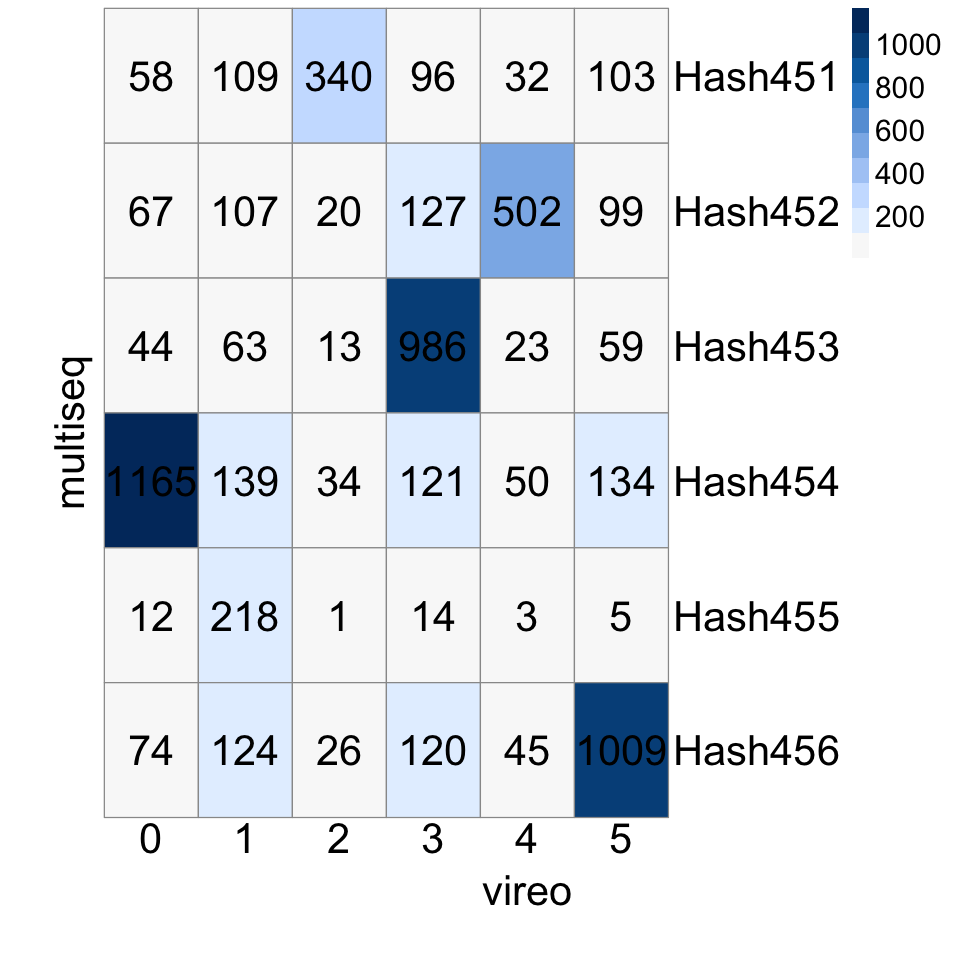

In [4]:
# Create an empty matrix
confusion_matrix_v_multiseq = as.data.frame(matrix(ncol = 6, nrow = 6))
colnames(confusion_matrix_v_multiseq) = donor_list_vireo
rownames(confusion_matrix_v_multiseq) = donor_list

for (j in c(0:5)){
  for (i in c(1:6)){
    row = nrow(hash_gene_result[hash_gene_result$vireo == donor_list_vireo[j+1] &
                                  hash_gene_result$multiseq == donor_list[i],])
    confusion_matrix_v_multiseq[i, j+1] = row
  }
}

confusion_matrix_v_multiseq

pdf("S22-heatmap-v-multiseq-gx38.pdf", width=15, height=11)


# Add axis title
setHook("grid.newpage", function() 
    pushViewport(viewport(x=1,y=1,width=0.9, height=0.9, name="vp", just=c("right","top"))), action="prepend")

pheatmap(confusion_matrix_v_multiseq, treeheight_row=F, treeheight_col=F, display_numbers=T, angle_col="0",
         number_color = "black", fontsize_number= 25, fontsize = 18, cluster_rows = F, fontsize_row = 25, fontsize_col = 25, cluster_cols = F, number_format = "%.f",
         color = hcl.colors(10, "Blues 3", rev= T))

setHook("grid.newpage", NULL, "replace")
grid.text("vireo", y=-0.03, gp=gpar(fontsize=25))
grid.text("multiseq", x=-0.03, rot=90, gp=gpar(fontsize=25))
        
dev.copy()
dev.off()

,0,1,2,3,4,5
,<int>,<int>,<int>,<int>,<int>,<int>
Hash451,36,19,139,14,3,43
Hash452,5,7,2,9,197,4
Hash453,401,177,5,379,35,277
Hash454,15,0,1,1,0,0
Hash455,8,21,0,5,2,3
Hash456,2,2,0,2,1,11


pdf 
  3

pdf 
  2

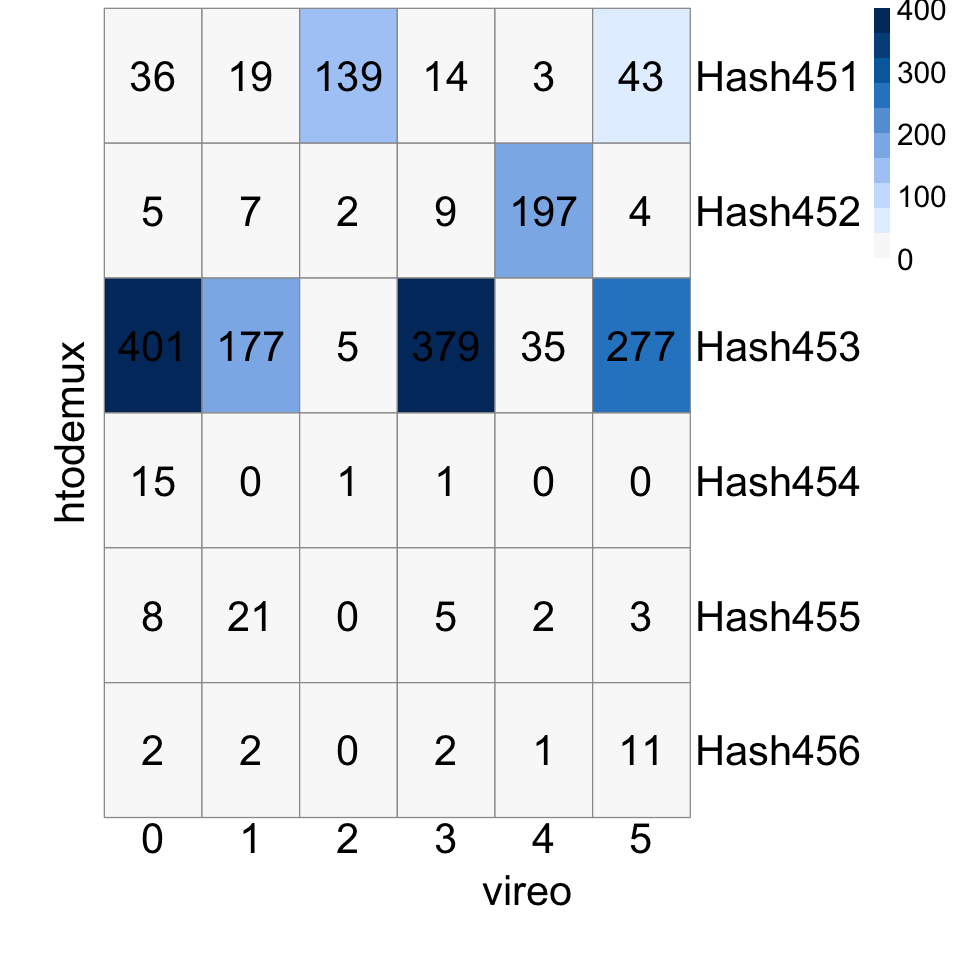

In [5]:
confusion_matrix_v_htodemux = as.data.frame(matrix(ncol = 6, nrow = 6))
colnames(confusion_matrix_v_htodemux) = donor_list_vireo
rownames(confusion_matrix_v_htodemux) = donor_list

for (j in c(0:5)){
  for (i in c(1:6)){
    row = nrow(hash_gene_result[hash_gene_result$vireo == donor_list_vireo[j+1] &
                                  hash_gene_result$htodemux == donor_list[i],])
    confusion_matrix_v_htodemux[i, j+1] = row
  }
}

confusion_matrix_v_htodemux

pdf("S23-heatmap-v-htodemux-gx38.pdf", width=15, height=11)

# Add axis title
setHook("grid.newpage", function() 
    pushViewport(viewport(x=1,y=1,width=0.9, height=0.9, name="vp", just=c("right","top"))), action="prepend")

pheatmap(confusion_matrix_v_htodemux, treeheight_row=F, treeheight_col=F, display_numbers=T, angle_col="0",
         number_color = "black", fontsize_number= 25, fontsize = 18, fontsize_row = 25, fontsize_col = 25, cluster_rows = F, cluster_cols = F, number_format = "%.f",
         color = hcl.colors(10, "Blues 3", rev= T))

setHook("grid.newpage", NULL, "replace")
grid.text("vireo", y=-0.03, gp=gpar(fontsize=25))
grid.text("htodemux", x=-0.03, rot=90, gp=gpar(fontsize=25))
        
dev.copy()
dev.off()

,0,1,2,3,4,5
,<int>,<int>,<int>,<int>,<int>,<int>
Hash451,1,20,4,0,5,4
Hash452,0,3,0,1,2,0
Hash453,128,132,7,144,211,135
Hash454,0,1,0,0,0,0
Hash455,0,0,0,0,0,0
Hash456,0,0,0,0,0,0


pdf 
  3

pdf 
  2

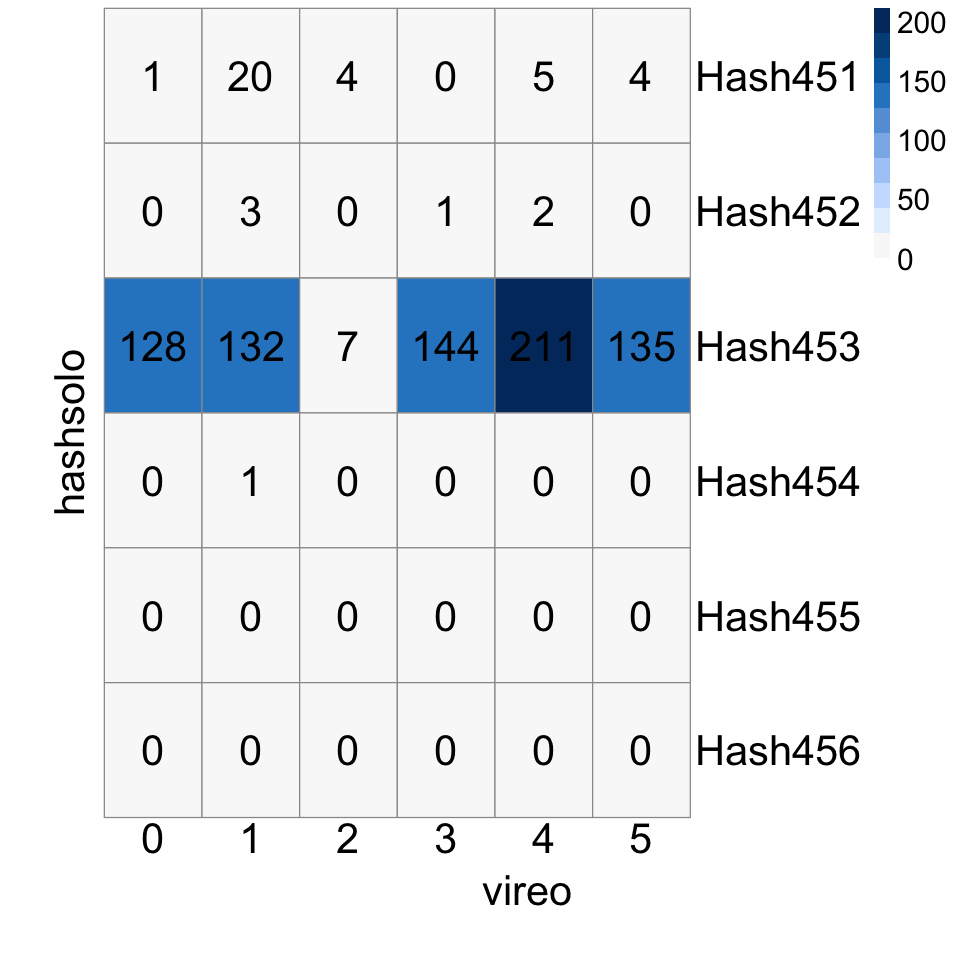

In [6]:
confusion_matrix_v_hashsolo = as.data.frame(matrix(ncol = 6, nrow = 6))
colnames(confusion_matrix_v_hashsolo) = donor_list_vireo
rownames(confusion_matrix_v_hashsolo) = donor_list

for (j in c(0:5)){
  for (i in c(1:6)){
    row = nrow(hash_gene_result[hash_gene_result$vireo == donor_list_vireo[j+1] &
                                  hash_gene_result$hashsolo == donor_list[i],])
    confusion_matrix_v_hashsolo[i, j+1] = row
  }
}

confusion_matrix_v_hashsolo

pdf("S24-heatmap-v-hashsolo-gx38.pdf", width=15, height=11)

# Add axis title
setHook("grid.newpage", function() 
    pushViewport(viewport(x=1,y=1,width=0.9, height=0.9, name="vp", just=c("right","top"))), action="prepend")

pheatmap(confusion_matrix_v_hashsolo, treeheight_row=F, treeheight_col=F, display_numbers=T, angle_col="0",
         number_color = "black", fontsize_number= 25, fontsize = 18, fontsize_row = 25, fontsize_col = 25, cluster_rows = F, cluster_cols = F, number_format = "%.f",
         color = hcl.colors(10, "Blues 3", rev= T))

setHook("grid.newpage", NULL, "replace")
grid.text("vireo", y=-0.03, gp=gpar(fontsize=25))
grid.text("hashsolo", x=-0.03, rot=90, gp=gpar(fontsize=25))
        
dev.copy()
dev.off()

,0,1,2,3,4,5
,<int>,<int>,<int>,<int>,<int>,<int>
Hash451,1,1,17,0,1,0
Hash452,0,0,0,0,9,0
Hash453,1,1,0,24,0,0
Hash454,1,0,0,0,0,0
Hash455,7,6,0,2,1,3
Hash456,1,1,0,2,0,1


pdf 
  3

pdf 
  2

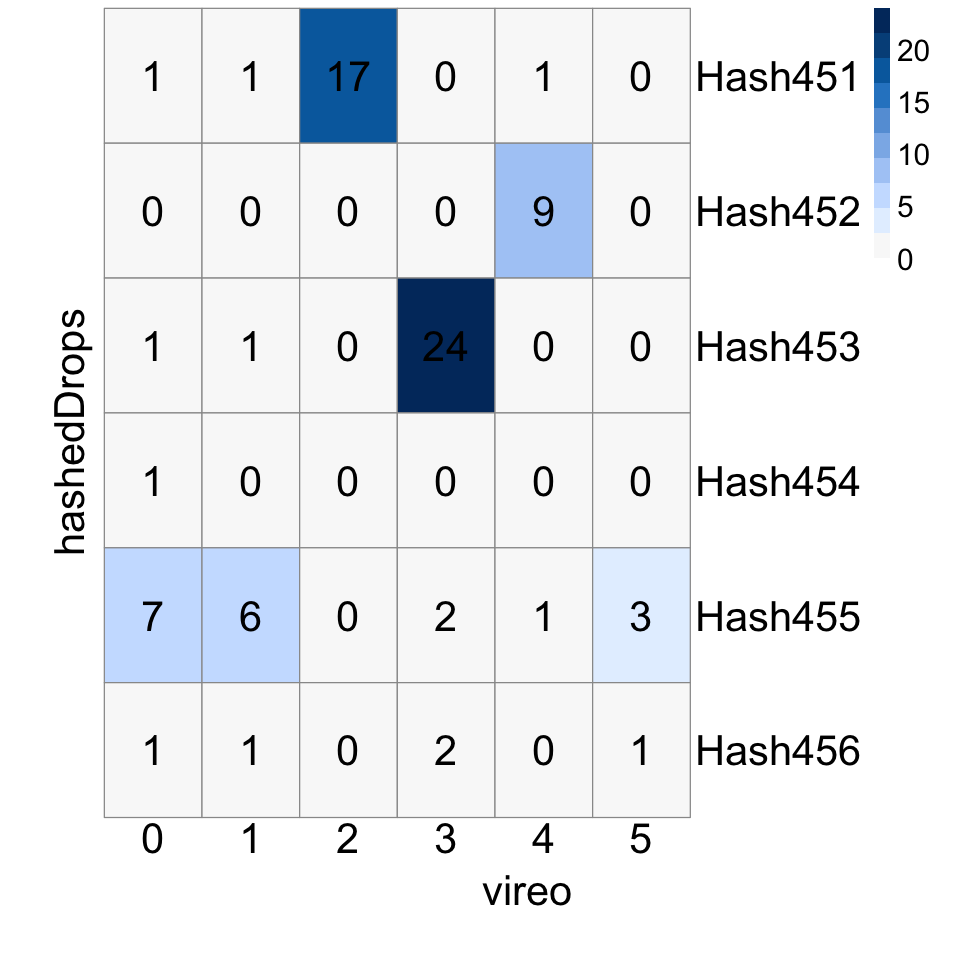

In [7]:
# Create an empyt matrix
confusion_matrix_v_hashedDrops = as.data.frame(matrix(ncol = 6, nrow = 6))
colnames(confusion_matrix_v_hashedDrops) = donor_list_vireo
rownames(confusion_matrix_v_hashedDrops) = donor_list

for (j in c(0:5)){
  for (i in c(1:6)){
    row = nrow(hash_gene_result[hash_gene_result$vireo == donor_list_vireo[j+1] &
                                  hash_gene_result$hashedDrops == donor_list[i],])
    confusion_matrix_v_hashedDrops[i, j+1] = row
  }
}

confusion_matrix_v_hashedDrops

pdf("S25-heatmap-v-hashedDrops-gx38.pdf", width=11, height=11)

# Change plot size to 8 x 8
options(repr.plot.width=8, repr.plot.height=8)

# Add axis title
setHook("grid.newpage", function() 
    pushViewport(viewport(x=1,y=1,width=0.9, height=0.9, name="vp", just=c("right","top"))), action="prepend")

pheatmap(confusion_matrix_v_hashedDrops, treeheight_row=F, treeheight_col=F, display_numbers=T, angle_col="0",
         number_color = "black", fontsize_number= 25, fontsize = 18, fontsize_row = 25, fontsize_col = 25, cluster_rows = F, cluster_cols = F, number_format = "%.f",
         color = hcl.colors(10, "Blues 3", rev= T))

setHook("grid.newpage", NULL, "replace")
grid.text("vireo", y=-0.03, gp=gpar(fontsize=25))
grid.text("hashedDrops", x=-0.03, rot=90, gp=gpar(fontsize=25))
        
dev.copy()
dev.off()